# 설정

In [1]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import os
import numpy as np

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Text Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<b>NLP이냐 텍스트 분석이냐?</b>

머신러닝이 보편화되면서 NLP<sup>National Language Processing</sup>와 텍스트 분석<sup>Text Analytics</sup>을 구분하는 것이 큰 의미는 없어 보이지만, 굳이 구분하자면 NLP는 머신이 인간의 이해를 이해하고 해석하는 데 더 중점을 두고 기술이 발전해 왔으며, 텍스트 마이닝<sup>Text Mining</sup>이라고 불리는 텍스트 분석은 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전해 왔다.

예를 들어 NLP의 영역에는 언어를 해석하기 위한 기계 번역, 자동으로 질문을 해석하고 답을 해주는 질의응답 시스템 등의 영역 등에서 텍스트 분석과 차별점이 있다. NLP는 텍스트 분석을 향상하게 하는 기반 기술이라고 볼 수도 있다. NLP 기술이 발전함에 따라 텍스트 분석도 더욱 정교하게 발전할 수 있었다. NLP와 텍스트 분석의 발전 근간에는 머신러닝이 존재한다. 예전의 텍스트를 구성하는 언어적인 룰이나 업무의 룰에 따라 텍스트를 분석하는 룰 기반 시스템에서 머신러닝의 텍스트 데이터를 기반으로 모델을 학습하고 예측하는 기반으로 변경되면서 많은 기술적 발전이 가능해졌다.

텍스트 분석은 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비지니스 인텔리전스<sup>Business Intelligence</sup>나 예측 분석 등의 분석 작업을 주로 수행한다. 머신러닝 기술에 힘입어 텍스트 분석은 크게 발전하고 있으며 주로 다음과 같은 기술 영역에 집중해왔다.

<ul>
    <li><b>텍스트 분류</b><sup>Text Classification</sup>: TextCategorization이라고도 한다. 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭한다. 예를 들어 특정 신문 기사 내용이 연애/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류하거나 스팸 메일 검출 같은 프로그램이 이에 속한다. 지도학습을 적용한다.</li>
    <li><b>감성 분석</b><sup>Sentiment Analysis</sup>: 텍스트에서 나타나는 감성/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법을 총칭한다. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰, 여론조사 의견 분석 등의 다양한 영역에서 활용된다. Text Analytics에서 가장 활발하게 사용되고 있는 분야다. 지도학습 방법뿐만 아니라 비지도학습을 이용해 적용할 수 있다.</li>
    <li><b>텍스트 요약</b><sup>Summarization</sup>: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법을 말한다. 대표적으로 토픽 모델링(Topic Modeling)이 있다.</li>
    <li><b>텍스트 군집화</b><sup>Clustering</sup><b>와 유사도 측정</b>: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법을 말한다. 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용될 수 있다. 유사도 측정 역시 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법이다.</li>
</ul>

# 텍스트 분석 이해

텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것이다. 지금까지 ML 모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행했다. 그리고 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가 하는 것이 매우 중요한 요소다. 텍스트를 word(또는 word의 일부분) 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 피처 벡터화<sup>Feature Vectorization</sup> 또는 피처 추출<sup>Feature Extraction</sup>이라고 한다. 대표적으로 텍스트를 피처 벡터화해서 변환하는 방법에는 BOW<sup>Bag of Words</sup>와 Word2Vec 방법이 있다. 텍스트를 벡터값을 가지는 피처로 변환하는 것은 머신러닝 모델을 적용하기 전에 수행해야 할 매우 중요한 요소다.

## 텍스트 분석 수행 프로세스

머신러닝 기반의 텍스트 분석 프로세스는 다음과 같은 프로세스 순으로 수행한다.

<ol>
    <li><b>텍스트 사전 준비작업(텍스트 전처리)</b>: 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어(Word) 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것을 통칭한다.</li>
    <li><b>피처 벡터화/추출</b>: 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당한다. 대표적인 방법은 BOW와 Word2Vect이 있으며, BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있다.</li>
    <li><b>ML 모델 수립 및 학습/예측/평가</b>: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행한다.</li>
</ol>

## 파이썬 기반의 NLP, 텍스트 분석 패키지

파이썬 기반에서 NLP와 텍스트 분석을 위해 쉽고 편하게 특스트 사전 정제 작업, 피처 벡터화/추출, ML 모델을 지원하는 매우 훌륭한 라이브러리가 많다(아쉽게도 대부분 영어 기반의 라이브러리다). 대표적인 파이썬 기반의 NLP와 텍스트 분석 패키지를 소개한다.

NTLK는 방대한 데이터 세트와 서브 모듈, 다양한 데이터 세트를 지원해 오래전부터 대표적인 파이썬 NLP 패키지였지만, 수행 성능과 정확도, 신기술, 엔터프라이즈한 기능 지원 등의 측면에서 부족한 부분이 있다. Genism과 SpaCy는 이러한 부분을 보완하면서 실제 업무에서 자주 활용되는 패키지다.

<ul>
    <li><b>NLTK(Natural Language Toolkit for Python)</b>: 파이썬의 가장 대표적인 NLP 패키지다. 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있다. 많은 NLP 패키지가 NLTK의 영향을 받아 작성되고 있다. 수행 속도 측면에서 아쉬운 부분이 있어서 실제 대량의 데이터 기반에서는 제대로 활용되지 못하고 있다.</li>
    <li><b>Gensim</b>: 토픽 모델링 분야에서 가장 두각을 나타내는 패키지다. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해 왔으며, Word2Vec 구현 등의 다양한 신기능도 제공한다. SpaCy와 함께 가장 많이 사용되는 NLP 패키지다.</li>
    <li><b>SpaCy</b>: 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지다. 많은 NLP 애플리케이션에서 SpaCy를 사용하는 사례가 늘고 있다.</li>
</ul>

사이킷런은 머신러닝 위주의 라이브러리여서 NLP를 위한 다양한 라이브러리, 예를 들어 '어근 처리'와 같은 NLP 패키지에 특화된 라이브러리는 가지고 있지 않다. 하지만 텍스트를 일정 수준으로 가공하고 머신러닝 알고리즘에 텍스트 데이터를 피처로 처리하기 위한 편리한 기능을 제공하고 있어 사이킷런으로도 충분히 텍스트 분석 기능을 수행할 수 있다. 하지만 더 다양한 텍스트 분석이 적용돼야 하는 경우, 보통은 NLTK/Gensim/SpaCy와 같은 NLP 전용 패키지와 함께 결합해 애플리케이션을 작성하는 경우가 많다.

# 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

텍스트 자체를 바로 피처로 만들 수는 없다. 이를 위해 사전에 텍스트를 가공하는 준비 작업이 필요하다. 텍스트 정규화는 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것을 의미한다. 텍스트 분석은 이러한 텍스트 정규화 작업이 매우 중요하다. 이러한 텍스트 정규화 작업은 크게 다음과 같이 분류할 수 있다.

<ul>
    <li>클렌징(Cleansing)</li>
    <li>토큰화(Tokenization)</li>
    <li>필터링/스톱 워드 제거/철자 수정</li>
    <li>어간 추출(Stemming)</li>
    <li>표제어 추출(Lemmatization)</li>
</ul>

텍스트 정규화의 주요 작업을 NLTK 패키지를 이용해 실습해 보겠다.

## 클렌징

텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업이다. 예를 들어 HTML, XML 태그나 특정 기호 등을 사전에 제거한다.

## 텍스트 토큰화

토큰화의 유형은 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나눌 수 있다. NLTK는 이를 위해 다양한 API를 제공한다.

### 문장 토큰화

문장 토큰화<sup>sentence tokenization</sup>은 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적이다. 또한 정규 표현식에 따른 문장 토큰화도 가능하다. NLTK에서 일반적으로 많이 쓰이는 <code>sent_tokenize</code>를 이용해 토큰화를 수행해 보겠다. 다음은 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리하는 예제다. NLTK의 경우 단어 사전과 같이 참조가 필요한 데이터 세트의 경우 인터넷으로 다운로드 받을 수 있다. 다운로드가 완료된 경우에는 다시 다운로드 하지 않지만 최초 다운로드가 필요하기 때문에 수행하려는 컴퓨터에 인터넷 연결이 돼 있는지 먼저 확인하고 다운로드를 수행하면 된다. 아래 코드에서 <code>nltk.download('punkt')</code>는 마침표, 개행 문자 등의 데이터 세트를 다운로드 받는다.

In [5]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this roo. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)

print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this roo.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<code>sent_tokenize()</code>가 반환하는 것은 각각의 문장으로 구성된 list 객체다. 반환된 list 객체가 3개의 문장으로 된 문자열을 가지고 있는 것을 알 수 있다.

### 단어 토큰화

단어 토큰화<sup>Word Tokenization</sup>는 문장을 단어로 토큰화하는 것이다. 기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.

마침표(.)나 개행문자와 같이 문장을 분리하는 구분자를 이용해 단어를 토큰화할 수 있으므로 Bag of Word 와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분하다. 일반적으로 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용한다. NLTK에서 기본으로 제공하는 <code>word_tokenize()</code>를 이용해 단어로 토큰화해 보겠다.

In [6]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


이번에는 <code>sent_tokenize()</code>와 <code>word_tokenize()</code>를 조합해 문서에 대해서 모든 단어를 토큰화해 보겠다. 이전 예제에서 선언된 3개의 문장으로 된 text_sample을 문장별로 단어 토큰화를 적용한다. 이를 위해 문서를 먼저 문장으로 나누고, 개별 문장을 다시 단어로 토큰화하는 <code>tokenize_text()</code> 함수를 생성하겠다.

In [7]:
from nltk import sent_tokenize, word_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장 별로 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'roo', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


3개 문장을 문장별로 먼저 토큰화했으므로 word_tokens 변수는 3개의 리스트 객체를 내포하는 리스트다. 그리고 내포된 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 가지고 있다.

문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수밖에 없다. 이러한 문제를 조금이라도 해결해 보고자 도입된 것이 n-gram이다. n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것이다. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행한다. 예를 들어 "Agent Smith knocks the door"를 2-gram(bigram)으로 만들면 (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화 한다. 앞서 분리한 단어들은 1-gram(unigram)이다. n-그램에서 n에 어떤 값을 선택할지는 애플리케이션마다 다르다. 예를 들어 카나리스<sup>Kanaris</sup> 등은 3 또는 4의 n-그램이 이메일 스팸 필터링에서 좋은 성능을 낸다고 밝혔다.

## 스톱 워드 제거

스톱 워드<sup>Stop word</sup>는 분석에 큰 의미가 없는 단어를 지칭한다. 가령 영어에서 is, the, a, will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어가 이에 해당한다. 이 단어의 경우 문법적인 특성으로 인해 특히 빈번하게 텍스트에 나타나므로 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있다. 따라서 이 의미 없는 단어를 제거하는 것이 중요한 전처리 작업이다.

언어별로 이러한 스톱 워드가 목록화돼 있다. NLTK의 경우 가장 다양한 언어의 스톱 워드를 제공한다. NLTK의 스톱 워드에는 어떤 것이 있는지 확인해 보겠다. 이를 위해 먼저 NLTK의 stopwords 목록을 내려받는다.

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

다운로드가 완료되고 나면 NLTK의 English의 경우 몇 개의 stopwords가 있는지 알아보고 그중 20개만 확인해 보겠다.

In [9]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


영어의 경우 스톱 워드의 개수가 179개이며, 그중 20개만 살펴보면 위의 결과와 같다. 바로 위 예제에서 3개의 문장별로 단어를 토큰화해 생성된 word_tokens 리스트(3개의 문장별 단어 토큰화 값을 가지는 내포된 리스트로 구성)에 대해서 stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출해 보겠다.

In [10]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환합니다.
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'roo', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


is, this와 같은 스톱 워드가 필터링을 통해 제거됐음을 알 수 있다.

## Stemming과 Lemmatization

많은 언어에서 문법적인 요소에 따라 단어가 다양하게 변한다. 영어의 경우 과거/현재, 3인칭 단수 여부, 진행형 등 매우 많은 조건에 따라 원래 단어가 변화한다. 가령 work는 동사 원형인 단어지만, 과거형은 worked, 3인칭 단수일 때 works, 진행형인 경우 working 등 다양하게 달라진다. Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것이다.

두 기능 모두 원형 단어를 찾는다는 목적은 유사하지만, Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다. Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있다. 이에 반해 Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아준다. 따라서 Lemmatization이 Stemming보다 변환에 더 오랜 시간을 필요로 한다.

NLTK는 다양한 Stemmer를 제공한다. 대표적으로 Porter, Lancaster, Snowball Stemmer가 있다. 그리고 Lemmatization을 위해서는 WordNetLemmatizer를 제공한다. 다음에서 이 클래스를 이요해 Stemming과 Lemmatization을 비교해 보겠다. 먼저 NLTK의 LancasterStemmer를 이용해 Stemmer부터 살펴보겠다. 진행형, 3인칭 단수, 과거형에 따른 동사, 그리고 비교, 최상에 따른 형용사의 변화에 따라 Stemming은 더 단순하게 원형 단어를 찾아준다. NLTK에서는 <code>LancasterStemmer()</code>와 같이 필요한 Stemmer 객체를 생성한 뒤 이 객체의 <code>sten('단어')</code> 메서드를 호출하면 원하는 '단어'의 Stemming이 가능하다.

In [11]:
from nltk import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


word의 경우 진행형(working), 3인칭 단수(works), 과거형(worked) 모두 기본 단어인 work에 ing, s, ed가 붙는 단순한 변화이므로 원형 단어로 work를 제대로 인식한다. 하지만 amuse의 경우, 각 변화가 amuse가 아닌 amus에 ing, s, ed가 붙으므로 정확한 단어인 amuse가 아닌 amus를 원형 단어로 인식한다. 형용사인 happy, fancy의 경우도 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식하는 경우가 발생한다.

이번에는 WordNetLemmatizer를 이용해 Lemmatization을 수행해 보겠다. 일반적으로 Lemmatization은 보다 정확한 원형 단어 추출을 위해 단어의 '품사'를 입력해줘야 한다. 다음 예제에서 볼 수 있듯이 <code>lemmaitze()</code>의 파라미터로 동사의 경우 'v', 형용사의 경우 'a'를 입력한다.

In [12]:
from nltk import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


앞의 Stemmer보다 정확하게 원형 단어를 추출해줌을 알 수 있다.

# Bag of Words - BOW

Bag of Words 모델은 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델이다. 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤에 흔들어서 섞는 다는 의미로 Bag of Words(BOW) 모델이라고 한다.

다음과 같은 2개의 문장이 있다고 가정하고 이 문장을 Bag of words의 단어 수(Word Count) 기반으로 피처를 추출해 보겠다.

<b>문장 1:</b><br>
'My wife likes to watch baseball games and my daughter likes to watch baseball games too'

<b>문장 2:</b><br>
'My wife likes to play baseball'

<ol>
    <li>문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어(feature 또는 term)를 칼럼 형태로 나열한다. 그리고 나서 각 단어에 고유의 인덱스를 다음과 같이 부여한다.<br>
        'and':0, 'baseball':1, 'daughter':2, 'games':3, 'likes':4, 'my':5, 'play':6, 'to':7, 'too':8, 'watch':9, 'wife':10</li>
    <li> 개별 문장에서 해당 단어가 나타나는 횟수(Occurrence)를 각 단어(단어 인덱스)에 기재한다. 예를 들어 baseball은 문장 1, 2에서 총 2번 나타나며, daughter는 문장 1에서만 1번 나타난다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-baqh"></th>
    <th class="tg-baqh">Index 0</th>
    <th class="tg-baqh">Index 1</th>
    <th class="tg-baqh">Index 2</th>
    <th class="tg-baqh">Index 3</th>
    <th class="tg-baqh">Index 4</th>
    <th class="tg-baqh">Index 5</th>
    <th class="tg-baqh">Index 6</th>
    <th class="tg-baqh">Index 7</th>
    <th class="tg-baqh">Index 8</th>
    <th class="tg-baqh">Index 9</th>
    <th class="tg-baqh">Index 10</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-baqh"></td>
    <td class="tg-amwm">and</td>
    <td class="tg-amwm">baseball</td>
    <td class="tg-amwm">daughter</td>
    <td class="tg-amwm">games</td>
    <td class="tg-amwm">likes</td>
    <td class="tg-amwm">my</td>
    <td class="tg-amwm">play</td>
    <td class="tg-amwm">to</td>
    <td class="tg-amwm">too</td>
    <td class="tg-amwm">watch</td>
    <td class="tg-amwm">wife</td>
  </tr>
  <tr>
    <td class="tg-amwm">문장 1</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-amwm">문장 2</td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh"></td>
    <td class="tg-baqh">1</td>
  </tr>
</tbody>
</table>

BOW 모델의 장점은 쉽고 빠른 구축에 있다. 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타낼 수 있는 모델이어서 전통적으로 여러 분야에서 활용도가 높다. 하지만 BOW 기반의 NLP 연구는 여러 가지 제약에 부딪히고 있는데, 대표적인 단점은 다음과 같다.

<ul>
    <li><b>문맥 의미(Semantic Context) 반영 부족</b>: BOW는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시된다. 물론 이를 보완하기 위해 n_gram 기법을 활용할 수 있지만, 제한적인 부분에 그치므로 언어의 많은 부분을 차지하는 문맥적인 해석을 처리하지 못하는 단점이 있다.</li>
    <li><b>희소 행렬 문제(희소성, 희소 행렬)</b>: BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉽다. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어진다. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많다. 즉, 매우 많은 문서에서 단어의 총 개수는 수만 ~ 수십만 개가 될 수 있는데, 하나의 문서에 있는 단어는 이 중 극히 일부분이므로 대부분의 데이터는 0 값으로 채워지게 된다. 이처럼 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 희소 행렬<sup>Sparse Matrix</sup>이라고 한다. 이와는 반대로 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬을 밀집 행렬<sup>Dense Matrix</sup>이라고 한다. 희소 행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련돼 있다.

## BOW 피처 벡터화

머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없다. 따라서 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화라고 한다. 예를 들어 피처 벡터화는 각 문서(Document)의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법이다. 피처 벡터화는 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함한다(Text Analysis에서는 피처 벡터화와 피처 추출을 같은 의미로 사용하곤 한다).

BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것이다. 예를 들어 M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 문서의 피처 벡터화를 수행하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 된다. 결과적으로 M X N 개의 단어 피처로 이뤄진 행렬을 구성하게 된다.

<div style='text-align:center;'>
    <img src='./images/Text Analysis/BOW 피처 벡터화.png'>
</div>

일반적으로 BOW의 피처 벡터화는 두 가지 방식이 있다.

<ul>
    <li>카운트 기반의 벡터화</li>
    <li>TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화</li>
</ul>

단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우를 카운트 벡터화라고 한다. 카운트 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식된다. 그러나 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 된다. 이러한 문제를 보완하기 위해 TF-IDF(Term Frequency - Inverse Document Frequency) 벡터화를 사용한다. TF-IDF는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여한다.

만일 어떤 문서에서 특정 단어가 자주 나타나면 그 단어는 해당 문서를 특징짓는 중요 단어일 수 있다. 하지만 그 단어가 다른 문서에도 자주 나타나는 단어라면 해당 단어는 언어 특성상 범용적으로 자주 사용되는 단어일 가능성이 높다. 가령 여러 가지 뉴스의 문서에서 '분쟁', '종교 대립', '유혈 사태'와 같은 단어가 자주 나타난다면 해당 문서는 지역 분쟁과 관련한 뉴스일 가능성이 높고 해당 언어는 그 문서의 특징을 잘 나타낸다고 할 수 있다. 하지만 '많은', '빈번하게', '당연히', '조직', '업무' 등과 같은 단어의 경우는 문서의 특징과 관련성이 적지만 보편적으로 많이 사용되기 때문에 문서에 반복적으로 사용될 가능성이 높다. 이러한 단어가 단순히 등장하는 횟수에 따라 중요도를 평가받는다면 문서를 특징짓기가 어려워진다. 따라서 모든 문서에서 반복적으로 자주 발생하는 단어에 대해서는 페널티를 부여하는 방식으로 단어에 대한 가중치의 균형을 맞추는 것이다. 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장할 수 있다.

TF-IDF는 단어 빈도와 <b>역문서 빈도</b><sup>inverse document frequency</sup>의 곱으로 정의된다.

$$
\text{tf-idf(t, d)} = \text{tf}(t, d) \times \text{idf}(t, d)
$$

여기서 $tf(t, d)$는 문서 $d$에 등장한 단어 $t$의 횟수다. $idf(t, d)$는 역문서 빈도로 다음과 같이 계산한다.

$$
\text{idf}(t,d) = log\frac{n_d}{1+\text{df}(d,t)}
$$

여기서 $n_d$는 전체 문서 개수고 $df(d,t)$는 단어 $t$가 포함된 문서 $d$의 개수다. 분모에 상수 1을 추가하는 것은 선택 사항이다. 훈련 샘플에 한 번도 등장하지 않는 단어가 있는 경우 분모가 0이 되지 않게 만든다. $log$는 문서 빈도 $df(d,t)$가 낮을 때 역문서 빈도 값이 너무 커지지 않도록 만든다.

## 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

사이킷런의 CountVectorizer 클래스는 카운트 기반의 벡터화를 구현한 클래스다. 사이킷런의 CountVectorizer 클래스는 단지 피처 벡터화만 수행하지는 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행한다. CountVecotrizer에 이러한 텍스트 전처리 및 피처 벡터화를 위한 입력 파라미터를 설정해 동작한다. CountVectorizer 역시 사이킷런의 다른 피처 변환 클래스와 마찬가지로 <code>fit()</code>와 <code>transform()</code>을 통해 피처 벡터화된 객체를 반환한다.

먼저 CountVectorizer의 입력 파라미터는 다음과 같다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">파라미터 명</th>
    <th class="tg-1wig">파라미터 설명</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">max_df</td>
    <td class="tg-0lax">전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터다. 너무 높은 빈도수를 가지는 단어는 스톱 워드와 비슷한 문법적인 특성으로 반복적인 단어일 가능성이 높기에 이를 제거하기 위해 사용된다.<br>max_df = 100과 같이 정수 값을 가지면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출한다. max_df = 0.95와 같이 부동소수점 값(0.0 ~ 1.0)을 가지면 전체 문서에 걸쳐 빈도수 0~95%까지의 단어만 피처로 추출하고 나머지 상위 5%는 피처로 추출하지 않는다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">min_df</td>
    <td class="tg-0lax">전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터다. 수백~수천 개의 전체 문서에서 특정 단어가 min_df에 설정된 값보다 적은 빈도수를 가진다면 이 단어는 크게 중요하지 않거나 가비지(garbage)성 단어일 확률이 높다.<br>min_df = 2와 같이 정수 값을 가지면 전체 문서에 걸쳐서 2번 이하로 나타나는 단어는 피처로 추출하지 않는다. min_df = 0.02와 같이 부동소수점 값(0.0 ~ 1.0)을 가지면 전체 문서에 걸쳐서 하위 2% 이하의 빈도수를 가지는 단어는 피처로 추출하지 않는다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">max_features</td>
    <td class="tg-0lax">추출하는 피처의 개수를 제한하며 정수로 값을 지정한다. 가령 max_features = 2000으로 지정할 경우 가장 높은 빈도수를 가지는 단어 순으로 정렬해 2000개까지만 피처로 추출한다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">stop_words</td>
    <td class="tg-0lax">'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외한다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">n_gram_range</td>
    <td class="tg-0lax">Bag of Words 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정한다. 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정한다.<br>예를 들어 (1, 1)로 지정하면 토큰화된 단어를 1개씩 피처로 추출한다. (1, 2)로 지정하면 토큰화된 단어를 1개씩(minimum 1), 그리고 순서대로 2개씩(maximum 2) 묶어서 피처로 추출한다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">analyzer</td>
    <td class="tg-0lax">피처 추출을 수행한 단위를 지정한다. 당연히 디폴트는 'word'다. Word가 아니라 character의 특정 범위를 피처로 만드는 특정한 경우 등을 적용할 때 사용된다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">token_pattern</td>
    <td class="tg-0lax">토큰화를 수행하는 정규 표현식 패턴을 지정한다. 디폴트 값은 '\b\w\w+\b'로, 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자(문자 또는 숫자, 즉 영숫자) 이상의 단어(word)를 토큰으로 분리한다. analyzer'word'로 설정했을 때만 변경 가능하나 디폴트 값을 변경한 경우는 거의 발생하지 않는다.</td>
  </tr>
  <tr>
    <td class="tg-0lax">tokenizer</td>
    <td class="tg-0lax">토큰화를 별도의 커스텀 함수로 이용시 적용한다. 일반적으로 CountTokenizer 클래스에서 어근 변환 시 이를 수행하는 별도의 함수를 tokenizer 파라미터에 적용하면 된다.</td>
  </tr>
</tbody>
</table>

입력 파라미터로 텍스트 전처리를 위한 stop_words 등이 있는 것을 알 수 있다. 예제를 통해 CountVectorzier 클래스의 사용법을 알아보겠다.

보통 사이킷런의 CountVecotrizer 클래스를 이용해 카운트 기반의 피처 여러 개의 문서로 구성된 텍스트의 피처 벡터화 방법은 다음과 같다.

첫째, 영어의 경우 모든 문자를 소문자로 변경하는 등의 전처리 작업을 수행한다. 둘째는 디폴트로 단어 기준으로 n_gram_range를 반영해 각 단어를 토큰화한다. 셋째, 텍스트 정규화를 수행한다. 단, stop_words='english'와 같이 stop_words 파라미터가 주어진 경우 스톱 워드 필터링만 가능하다. Stemming과 Lemmatization 같은 어근 변환은 CountVectorizer에서 직접 지원하지 않으나 tokenizer 파라미터에 커스텀 어근 변환 함수를 적용하여 어근 변환을 수행할 수 있다. 마지막으로 max_df, min_df, max_features 등의 파라미터를 이용해 토큰화된 단어를 추출하고 단어 빈도수 벡터 값을 적용한다.

<div style='text-align:center;'>
    <img src='./images/Text Analysis/CountVectorizer를 이용한 피처 벡터화.png'>
</div>

CountVectorizer를 위 BOW를 설명할 때 예시로 들었던 문장 2개에 적용해보자.

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
        'My wife likes to watch baseball games and my daughter likes to watch baseball games too',
        'My wife likes to play baseball'])
bag = count.fit_transform(docs)

CountVectorizer의 <code>fit_transform()</code> 메서드를 호출하면 BOW 모델의 어휘 사전을 구축하고 예시 문장을 희소한 특성 벡터로 변환한다.

어휘 사전의 내용을 출력해 보면 BOW 모델의 개념을 이해하는 데 도움이 된다.

In [14]:
print(count.vocabulary_)

{'my': 5, 'wife': 10, 'likes': 4, 'to': 7, 'watch': 9, 'baseball': 1, 'games': 3, 'and': 0, 'daughter': 2, 'too': 8, 'play': 6}


이전 결과에서 볼 수 있듯이 어휘 사전은 고유 단어와 정수 인덱스가 매핑된 파이썬 딕셔너리에 저장되어 있다. 그다음 만들어진 특성 벡터를 출력해 보자.

In [15]:
print(bag.toarray())

[[1 2 1 2 2 2 0 2 1 2 1]
 [0 1 0 0 1 1 1 1 0 0 1]]


특성 벡터의 각 인덱스는 CountVectorizer의 어휘 사전 딕셔너리에 저장된 정수 값에 해당된다. 예를 들어 인덱스 0에 있는 첫 번째 특성은 'and' 단어의 카운트를 의미한다. 이 단어는 첫 번째 문서에만 나타나는 것을 확인할 수 있다. 인덱스 1에 있는 (특성 벡터의 두 번째 열) 단어 'baseball'은 두 문장에 모두 등장한다.

사이킷런의 라이브러리에는 CountVectorizer 클래스에서 만든 단어 빈도를 입력받아 TF-IDF로 변환하는 TfidfTransformer 클래스가 구현되어 있다. TfidfVectorizer는 텍스트 데이터를 입력받아 BOW 특성 추출과 TF-IDF 변환을 수행한다.<sup><a id="a01" href="#p01">[1]</a></sup> 파라미터와 변환 방법은 CountVectorizer와 동일하므로 자세한 설명은 생략한다.

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)
np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs))
      .toarray())

[[0.23 0.32 0.23 0.45 0.32 0.32 0.   0.32 0.23 0.45 0.16]
 [0.   0.38 0.   0.   0.38 0.38 0.53 0.38 0.   0.   0.38]]


첫 번째 문서에서 단어 'to'가 많이 나타났기 때문에 단어 빈도가 컸다. 동일한 특성 벡터를 TF-IDF로 변환하면 단어 'to'는 비교적 작은 TF-IDF를 가진다(0.32). 이 단어는 두 번째 문서에도 나타나므로 판별에 유용한 정보를 가지고 있지 않을 것이다.

수동으로 특성 벡터에 있는 각 단어의 TF-IDF를 계산해 보면 TfidfTransformer가 앞서 정의한 표준 TF-IDF 공식과 조금 다르게 계산한다는 것을 알 수 있다. 사이킷런에 구현된 역문서 빈도 공식은 다음과 같다.

$$
\text{idf}(t, d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}
$$

비슷하게 사이킷런에서 계산하는 TF-IDF는 앞서 정의한 공식과 조금 다르다.

$$
\text{tf-idf}(t, d) = \text{tf}(t, d)\times(\text{idf}(t, d) + 1)
$$

일반적으로 TF-IDF를 계산하기 전에 단어 빈도(tf)를 정규화하지만 TfdifTransformer 클래스는 TF-IDF를 직접 정규화한다. 사이킷런의 TfidfTransformer는 기본적으로 L2 정규화를 적용한다(norm='l2'). 정규화되지 않은 특성 벡터 v를 L2-노름으로 나누면 길이가 1인 벡터가 반환된다. 이렇게 스케일이 바뀐 벡터는 문서의 길이(단어의 수)에 영향을 받지 않는다.

$$
\mathrm{v}_{\text{norm}} = \frac{\mathrm{v}}{||\mathrm{v}||_2} = \frac{\mathrm{v}}{\sqrt{\mathrm{v_1^2 + v_2^2 + \cdots + v_n^2}}} = \frac{\mathrm{v}}{(\sum_{i=1}^n\mathrm{v}_i^2)^{1/2}}
$$

## BOW 벡터화를 위한 희소 행렬

사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환한다. 사용자 입장에서 피처 벡터화된 희소 행렬이 어떤 형태인지 중요하지 않을 수 있다만, 좀 더 난이도가 있는 ML 모델을 수립하기 위해서는 이러한 희소 행렬이 어떤 형태로 돼 있는지 알아야 한다. 먼저 희소 행렬에 관해 설명한다.

모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수밖에 없다. 모든 문서에 있는 단어를 중복을 제거하고 피처로 만들면 일반적으로 수만 개에서 수십만 개의 단어가 만들어진다. 만일 n-gram을 (1, 2)나 (1, 3)으로 증가시키면 칼럼 수는 더욱 증가할 수밖에 없다. 그런데 이러한 대규모의 행렬이 생성되더라도 레코드의 각 문서가 가지는 단어의 수는 제한적이기 때문에 이 행렬의 값은 대부분 0이 차지할 수밖에 없다. 이처럼 대규모 행렬의 대부분의 값을 0이 차지하는 행렬을 가리켜 희소 행렬이라고 한다. BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬이다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-amwm"></th>
    <th class="tg-amwm">단어<br>1</th>
    <th class="tg-amwm">단어<br>2</th>
    <th class="tg-amwm">단어<br>3</th>
    <th class="tg-amwm">...</th>
    <th class="tg-amwm">단어<br>1000</th>
    <th class="tg-amwm">...</th>
    <th class="tg-amwm">단어<br>2000</th>
    <th class="tg-amwm">...</th>
    <th class="tg-amwm">단어<br>10000</th>
    <th class="tg-amwm">...</th>
    <th class="tg-amwm">단어<br>20000</th>
    <th class="tg-amwm">...</th>
    <th class="tg-amwm">단어<br>100000</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">문서1</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">2</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-amwm">문서2</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-amwm">문서<br>...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
    <td class="tg-baqh">...</td>
  </tr>
  <tr>
    <td class="tg-amwm">문서<br>10000</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
  </tr>
</tbody>
</table>

이 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모된다. 따라서 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법으로 COO 형식과 CSR 형식이 있다. 일반적으로 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 CSR 형식이 더 뛰어나기 때문에 CSR을 많이 사용한다. 먼저 COO 방식부터 설명하겠다.

### 희소 행렬 - COO 형식

COO(Coordinate: 좌표) 형식은 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식이다. 예를 들어 [[3, 0, 1], [0, 2, 0]]과 같은 2차원 데이터가 있다고 가정하자. 0이 아닌 데이터는 [3, 1, 2]이며 0이 아닌 데이터가 있는 위치를 (row, column)로 표시하면 (0, 0), (0, 2), (1, 1)가 된다. 로우와 칼럼을 별도의 배열로 저장하면 로우는 [0, 0, 1]이고 칼럼은 [0, 2, 1]이다.

파이썬 세계에서는 희소 행렬 변환을 위해서 주로 사이파이(Scipy)를 이용한다. 사이파이의 sparse 패키지는 희소 행렬 변환을 위한 다양한 모듈을 제공한다. 사이파이의 sparse를 이용해 희소 행렬 변환을 COO 형식으로 수행해 보겠다. 먼저 [[3, 0, 1], [0, 2, 0]]을 넘파이의 ndarray 객체로 만들겠다. 그리고 이후에 COO 형식의 희소 행렬로 변환하겠다.

In [17]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

이제 위 밀집 행렬을 사이파이의 coo_matrix 클래스를 이용해 COO 형식의 희소 행렬로 변환해 보겠다. 0이 아닌 데이터를 별도의 배열 데이터로 만들고, 행 위치 배열과 열 위치 배열을 각각 만든 후 <code>coo_matrix()</code> 내에 생성 파라미터로 입력하면 된다.

In [18]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

sparse_coo는 COO 형식의 희소 행렬 객체 변수다. 이를 <code>toarray()</code> 메서드를 이용해 다시 밀집 형태의 행렬로 출력해 보겠다.

In [19]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

다시 원래의 데이터 형태로 추출됨을 알 수 있다.

### 희소 행렬 - CSR 형식

CSR(Compressed Sparse Row) 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식이다. 먼저 COO 변환 형식의 문제점을 알아보겠다. 다음과 같은 2차원 배열을 COO 형식으로 변환해 보겠다.

In [20]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

그럼 데이터 배열은 [1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1]이며 행 위치 배열은 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5], 열 위치 배열은 [2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0]이 된다.

행 위치 배열인 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5]를 주의 깊게 보면 순차적인 같은 값이 반복적으로 나타남을 알 수 있다. 즉, 0이 2번, 1이 5번 반복되고 있다. 행 위치 배열이 0부터 순차적으로 증가하는 값으로 이뤄졌다는 특성을 고려하면 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 이러한 방법을 제거할 수 있다(즉, 위치의 위치를 표기하는 것이다). 행 위치 배열의 첫 번째(인덱스 0)는 0, 두 번째(인덱스 1)는 0, 세 번째(인덱스 2)는 1이라면 행 위치 배열의 고유 값 시작 위치는 첫 번째와 세 번째이고 인데긋 기준으로 [0, 2]이다. CSR는 Compressed Sparse Row의 약자이며, 이처럼 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식을 의미한다.

행 위치 배열 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5]를 CSR로 변환하면 [0, 2, 7, 9, 10, 12]가 된다. 그리고 맨 마지막에는 데이터의 총 항목 개수를 배열에 추가한다. 최종적으로 CSR 변환되는 배열은 [0, 2, 7, 9, 10 ,12, 13]이다. 이렇게 고유 값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있기에 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능하다.

CSR 방식의 변환은 사이파이의 csr_matrix 클래스를 이용해 쉽게 할 수 있다. 0이 아닌 데이터 배열과 열 위치 배열, 그리고 행 위치 배열의 고유한 값의 시작 위치 배열을 csr_matrix의 생성 파라미터로 입력하면 된다.

In [21]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


COO와 CSR이 어떻게 희소 행렬의 메모리를 줄일 수 있는지 지금까지 예제를 통해서 살펴봤다. 실제 사용 시에는 다음과 같은 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성한다.

In [22]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

사이킷런의 CountVectorizer나 TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 CSR 형태의 희소 행렬이다.

# 감성 분석

## 감성 분석 소개

감성 분석<sup>Sentiment Analysis</sup>은 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용되고 있다. 감성 분석은 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성<sup>Sentiment</sup> 수치를 계산하는 방법을 이용한다. 이러한 감성 지수는 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결정한다.

이러한 감성 분석은 머신러닝 관점에서 지도학습과 비지도학습 방식으로 나눌 수 있다.

<ul>
    <li>지도학습은 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일하다.</li>
    <li>비지도학습은 'Lexicon'이라는 일종의 감성 어휘 사전을 이용한다. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단한다.</li>
</ul>

## 지도학습 기반 감성 분석 실습 - IMDB 영화평

먼저 지도학습 기반으로 감성 분석을 수행하겠다. 유명한 IMDB의 영화 사이트의 영화평을 이용하겠다(감성 분석이라는 타이틀이 붙었지만 지도학습 기반 감성 분석은 텍스트 기반의 이진 분류라고 표현하고 싶다고 저자는 말한다). 영화평의 텍스트를 분석해 감성 분석 결과가 긍정 또는 부정인지를 예측하는 모델을 만들어 보겠다. 데이터는 <a href='https://www.kaggle.com/c/word2vec-nlp-tutorial/data' target='blank'>https://www.kaggle.com/c/word2vec-nlp-tutorial/data'</a>에서 내려받을 수 있다.

labeledTrainData.tsv 파일은 탭(\t) 문자로 분리된 파일이다. 판다스의 <code>read_csv()</code>를 이용하면 탭으로 칼럼이 분리된 파일도 DataFrame으로 쉽게 로딩할 수 있다. <code>read_csv()</code>의 인자로 sep="\t"를 명시해주면 된다.

In [23]:
import pandas as pd

review_df = pd.read_csv('./datasets/word2vec-nlp-tutorial/labeledTrainData.tsv', sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


로드된 데이터를 살펴보겠다. 피처는 다음과 같다.

<ul>
    <li><b>id</b>: 각 데이터의 id</li>
    <li><b>sentiment</b>: 영화평(review)의 Sentiment 결과 값(Target Label). 1은 긍정적 평가, 0은 부정적 평가를 의미한다.</li>
    <li><b>review</b>: 영화평의 텍스트다.</li>
</ul>

이번에는 텍스트가 어떻게 구성돼 있는지 review 칼럼의 텍스트 값을 하나만 살펴보겠다.

In [24]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

HTML 형식에서 추출해 \<br /> 태그가 여전히 존재한다. \<br /> 문자열은 피처로 만들 필요가 없으니 삭제하겠다. 판다스의 DataFrame/Series는 문자열 연산을 지원하기 위해 str 속성을 이용한다. DataFrame/Series 객체에서 str을 적용하면 다양한 문자열 연산을 수행할 수 있다. <code>replace()</code>를 str에 적용해 \<br /> 태그를 공백으로 모두 바꾸겠다.

그리고 영어가 아닌 숫자/특수문자 역시 Sentiment를 위한 피처로는 별 의미가 없어 보이므로 이들도 모두 공란으로 변경하겠다. 숫자/특수문자를 찾고 이를 변환하는 것은 정규 표현식을 이용하겠다(정규 표현식을 아는 것은 텍스트 처리를 하는 데 매우 큰 도움이 된다. 간단한 정규 표현식은 인터넷 등을 통해 익혀 두는 것이 유용하다). 파이썬의 re 모듈은 편리하게 정규 표현식을 지원한다. 정규 표현식 [^a-zA-Z]의 의미는 영어 대/소문자가 아닌 모든 문자를 찾는 것이다. <code>re.sub("[^a-zA-Z]", " ", x)</code>는 영어 대/소문자가 아닌 모든 문자를 찾아서 공란으로 변경한다. 판다스 DataFrame에 <code>re.sub()</code>는 lambda 식을 이용해 적용하겠다.

In [25]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

결정 값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 세트를 만들고, 원본 데이터 세트에서 id와 sentiment 칼럼을 삭제해 피처 데이터 세트를 생성한다. 그리고 <code>train_test_split()</code>을 이용해 학습용과 테스트용 데이터 세트로 분리하겠다.

In [26]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3,
                                                    random_state=156)
X_train.shape, y_test.shape

((17500, 1), (7500,))

학습용 데이터는 17,500개의 리뷰, 테스트용 데이터는 7,500개의 리뷰로 구성되었다.

이제 감상평(Review) 텍스트를 피처 벡터화한 후에 ML 분류 알고리즘을 적용해 예측 성능을 측정하겠다. 앞 절에서 설명한 Pipeline 객체를 이용해 이 두 가지를 한꺼번에 수행하겠다. 먼저 Count 벡터화를 적용해 예측 성능을 측정하고, 다음으로 TF-IDF 벡터화를 적용해 보겠다. Classifier는 LogisticRegression을 이용한다. 예측 성능 평가는 이진 분류임을 고려해 테스트 데이터 세트의 정확도와 ROC-AUC를 모두 측정하겠다.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1, 2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                        roc_auc_score(y_test, pred_probs)))

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8860, ROC-AUC는 0.9503


이번에는 TF-IDF 벡터화를 적용해 다시 예측 성능을 측정해 보겠다. 예제 코드는 위와 거의 같고, 단지 Pipeline에서 CountVectorizer를 TfidfVectorizer로 변경하면 된다.

In [28]:
# 스톱 워드는 english, filtering, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                        roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


TF-IDF 기반 피처 벡터화의 예측 성능이 조금 더 나아졌다.

## 비지도학습 기반 감성 분석 소개

비지도 감성 분석은 Lexicon을 기반으로 하는 것이다. 위의 지도 감성 분석은 데이터 세트가 레이블값을 가지고 있었다. 하지만 많은 감성 분석용 데이터는 이러한 결정된 레이블 값을 가지고 있지 않다. 이러한 경우에 Lexicon은 유용하게 사용될 수 있다(한글을 지원하는 Lexicon은 없어서 매우 아쉽다).

Lexicon은 일반적으로 어휘집을 의미하지만 여기서는 주로 감성만을 분석하기 위해 지원하는 감성 어휘 사전이다. 줄여서 감성 사전으로 표현하겠다. 감성 사전은 긍정(Positive) 감성 또는 부정(Negative) 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수<sup>Polarity score</sup>라고 한다. 이 감성 지수는 단어의 위치나 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정된다. 이러한 감성 사전을 구현한 대표격은 NLTK 패키지다. NLTK는 많은 서브 모듈을 가지고 있으며 그중에 감성 사전인 Lexicon 모듈도 포함돼 있다.

여기서 감성 사전을 좀 더 상세히 이해하기 위해 NLP 패키지의 WordNet을 먼저 설명하겠다. NLP에서 제공하는 WordNet 모듈은 방대한 영어 어휘 사전이다. WordNet은 단순한 어휘 사전이 아닌 시맨틱 분석을 제공하는 어휘 사전이다.

텍스트 분석<sup>Text Analytics</sup>을 공부하다 보면 아마도 '시맨틱'<sup>semantic</sup>이라는 용어를 자주 접하게 될 것이다. 시맨틱은 간단히 표현하면 '문맥상 의미'다. 알다시피 '말'이라는 것은 상황에 따라, 문맥에 따라, 화자의 몸짓이나 어조에 따라 다르게 해석될 수 있다. 동일한 단어나 문장이라도 다른 환경과 문맥에서는 다르게 표현되거나 이해될 수 있다.

영어단어 'Present'는 '선물'이라는 의미도 있지만, '현재'라는 의미도 있다. 우리말의 '밥 먹었어?'라는 표현은 단순히 식사했는가를 묻는 표현일 수도 있지만 안부를 묻는 표현일 수도 있다. 언어학에서 이러한 시맨틱을 표현하기 위해서 여러 가지 규칙을 정해왔으며, NLP 패키지는 시맨틱을 프로그램적으로 인터페이스할 수 있는 다양한 방법을 제공한다.

이처럼 WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사(명사, 동사, 형용사, 부사 등)로 구성된 개별 단어를 Synset(Sets of cognitive synonyms)이라는 개념을 이용해 표현한다. Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념이다.

NLTK의 감성 사전이 감성에 대한 훌륭한 사전 역할을 제공한 장점은 이전해야 하겠지만, 아쉽게도 예측 성능은 그리 좋지 못하다는 단점이 있다. 그 때문에 실제 업무의 적용은 NLTK 패키지가 아닌 다른 감성 사전을 적용하는 것이 일반적이다. NLTK를 포함한 대표적인 감성 사전은 다음과 같다.

<ul>
    <li><b>SentiWordNet</b>: NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것이다. WordNet의 Synset 개념을 감성 분석에 적용한 것이다. WordNet의 Synset별로 3가지 감성 점수<sup>sentiment score</sup>를 할당한다. 긍정 감성 지수, 부정 감성 지수, 객관성 지수가 그것이다. 긍정 감성 지수는 해당 단어가 감성적으로 얼마나 긍정적인가를, 부정 지수는 얼마나 감성적으로 부정적인가를 수치로 나타낸 것이다. 객관성 지수는 긍정/부정 감성 지수와 완전히 반대되는 개념으로 단어가 감성과 관계없이 얼마나 객관적인지를 수치로 나타낸 것이다. 문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지를 결정한다.</li>
    <li><b>VADER</b>: 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지다. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지다.</li>
    <li><b>Pattern</b>: 예측 성능 측면에서 가장 주목받는 패키지다. 아쉽게도 파이썬 3.x 버전에서 호환이 되지 안혹, 파이썬 2.x 버전에서만 동작한다.</li>
</ul>

SentiWordNet과 VADER 감성 사전을 이용해 감성 분석을 수행한 뒤 예측 성능을 지도학습 기반의 분류와 비교해 보겠다. 앞에서 SentiWordNet의 경우는 예측 정확도가 그리 높지 않아서 잘 사용하지 않는다고 말했지만, SentiWordNet을 통해 감성 사전이 전반적으로 어떠한 방식으로 구성되어 있고, 시맨틱 기반의 사전 구축 방식을 좀 더 자세히 이해할 수 있기에 WordNet 기반의 시맨틱에 대해서도 페이지를 할애했다.

## SentiWordNet을 이용한 감성 분석

### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

SentiWordNet은 WordNet 기반의 synset을 이용하므로 먼저 synset에 대한 개념을 이해한 후에 SentiWordNet을 살펴보겠다. 먼저 WordNet을 이용하기 위해서는 NLTK를 셋업한 후에 WordNet 서브패키지와 데이터 세트를 내려받아야 한다. NLTK의 모든 데이터 세트와 패키지를 내려받겠다. 처음 <code>nltk.download('all')</code>를 수행하면 많은 데이터를 내려받으므로 시간이 꽤 걸린다.

In [29]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_d

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_p

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Sangjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    

True

NLTK의 모든 데이터 세트를 내려받은 뒤에 WordNet 모듈을 임포트해서 'present' 단어에 대한 Synset을 추출하겠다. WordNet의 <code>synsets()</code>는 파라미터로 지정된 단어에 대해 WordNet에 등재된 모든 Synset 객체를 반환한다.

In [30]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성.
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


<code>synsets()</code> 호출 시 반환되는 것은 여러 개의 Synset 객체를 가지는 리스트다. 총 18개의 서로 다른 semantic을 가지는 synset 객체가 반환됐다. Synset('present.n.01')와 같이 Synset 객체의 파라미터 'present.n.01'은 POS 태그를 나타낸다. 'present.n.01'에서 present는 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의마가 여러 가지 있어서 이를 구분하는 인덱스다.

synset 객체가 가지는 여러 가지 속성을 살펴보겠다. Synset은 POS(Part of Speech로 우리말로 바꾸면 품사다), 정의(Definition), 부명제(Lemma) 등으로 시맨틱적인 요소로 표현할 수 있다.

In [31]:
for synset in synsets:
    print('##### Synset name : ', synset.name(), '#####')
    print('POS :', synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

Synset('present.n.01')과 Synset('present.n.02')는 명사지만 서로 다른 의미를 가지고 있다. Synset('present.n.01')은 POS가 noun.time이며 Definition을 살펴보면 '시간적인 의미로 현재'를 나타낸다. Synset('presnet.n.02')는 POS가 noun.possession이며 Definition은 '선물'이다. Synset('show.v.01')은 동사로서 POS가 verb.perception이며, Definition은 '관객에게 전시물 등을 보여주다'라는 뜻이다. 이처럼 synset은 하나의 단어가 가질 수 있는 여러 가지 시맨틱 정보를 개별 클래스로 나타낸 것이다.

WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다. synset 객체는 단어 간의 유사도를 나타내기 위해서 <code>path_similarity()</code> 메서드를 제공한다. <code>path_similarity()</code>를 이용해 'tree', 'lion', 'tiger', 'cat', 'dog'라는 단어의 상호 유사도를 살펴보겠다.

In [32]:
# synset 객체를 단어별로 생성한다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별로 synset을 반복하면서 다른 단어의 synset과 유사도를 측정한다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2)
                  for compared_entity in entities]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장한다.
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


lion은 tree와의 유사도가 0.07로 가장 적고, tiger과의 유사도가 0.33으로 가장 크다.

SentiWordNet은 WordNet의 Synset과 유사한 Senti_Synset 클래스를 가지고 있다. SentiWordNet 모듈의 <code>senti_synsets()</code>는 WordNet 모듈이라서 <code>synsets()</code>와 비슷하게 Senti_Synset 클래스를 리스트 형태로 반환한다.

In [33]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


SentiSynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성을(감성과 반대) 나타내는 객관성 지수를 가지고 있다. 감성 지수는 다시 긍정 감성 지수와 부정 가성 지수로 나뉜다. 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고, 감성 지수는 모두 0이 된다. 다음은 father(아버지)라는 단어와 fabulous(아주 멋진)라는 두 개 단어의 감성 지수와 객관성 지수를 나타낸다.

In [34]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:', father.pos_score())
print('father 부정감정 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감정 지수: ', fabulous.pos_score())
print('fabulous 부정감정 지수: ', fabulous.neg_score())

father 긍정감성 지수: 0.0
father 부정감정 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정감정 지수:  0.875
fabulous 부정감정 지수:  0.125


father는 객관적인 단어로 객관성 지수가 1.0이고 긍정 감성/부정 감성 지수 모두 0이다. 반면에 fabulous는 감성 단어로서 긍정 감성 지수가 0.875, 부정 감성 지수가 0.125다.

### SentiWordNet을 이용한 영화 감상평 감성 분석

이제 WordNet과 SentiWordNet을 개략적으로 살펴봤으니 이를 이용해 앞의 에제에서 적용한 IMDB 영화 감상평 감성 분석을 SentiWordNet Lexicon 기반으로 수행해 보겠다. SentiWordNet을 이용해 감성 분석을 수행하는 개략적인 순서는 다음과 같다.

<ol>
    <li>문서(Document)를 문장(Sentence) 단위로 분해</li>
    <li>다시 문장을 단어(Word) 단위로 토큰화하고 품사 태깅</li>
    <li>품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성</li>
    <li>Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정</li>
</ol>

SentiWordNet을 이용하기 위해서 WordNet을 이용해 문서를 다시 단어로 토큰화한 뒤 어근 추출<sup>Lemmatization</sup>과 품사 태깅<sup>POS Tagging</sup>을 적용해야 한다. 먼저 품사 태깅을 수행하는 내부 함수를 생성하겠다.

In [35]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

이제 문서를 문장 → 단어 토큰 → 품사 태깅 후에 SentiSynset 클래스를 생성하고 Polarity Score를 합산하는 함수를 생성하겠다. 각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성 지수가 0 이상일 경우 긍정 감성, 그렇지 않을 경우 부정 감성으로 예측한다.

In [36]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 → 품사 태깅 후에 SentiSynset 생성 → 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
            
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1
    
    return 0

이렇게 생성한 <code>swn_polarity(text)</code> 함수를 IMDB 감상평의 개별 문서에 적용해 긍정 및 부정 감성을 예측하겠다. 판다스의 apply lambda 구문을 이용해 <code>swn_polarity(text)</code>를 개별 감상평 텍스트에 적용한다. 지도학습 기반의 감성 분석에서 생성한 review_df DataFrame을 그대로 이용하겠다. review_df의 새로운 칼럼으로 'preds'를 추가해 이 칼럼에 <code>swn_polarity(text)</code>로 반환된 감성 평가를 담겠다. 그리고 실제 감성 평가인 'sentiment' 칼럼과 <code>swn_polarity(text)</code>로 반환된 결과의 정확도, 정밀도, 재현율 값을 모두 측정해 보겠다.

In [37]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

SentiWordNet의 감성 분석 예측 성능을 살펴보겠다.

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


정확도가 약 66.13%, 재현율이 약 70.91%이다. 정확도 지표를 포함한 전반적인 성능 평가 지표는 만족스러울 만한 수치는 아닌 것 같다. SentiWordNet은 WordNet의 하위 모듈로서 감성 분석을 위한 다양한 프레임워크를 제공한다. 이번에는 VADER를 이용해 감성 분석을 수행해 보겠다.

## VADER를 이용한 감성 분석

또 다른 Lexicon인 VADER Lexicon을 살펴보겠다. VADER는 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon이다. VADER는 SentimentIntensityAnalyzer 클래스를 이용해 쉽게 감성 분석을 제공한다. VADER는 NLTK 패키지의 서브 모듈로 제공될 수도 있고 단독 패키지로 제공될 수도 있다.

이제 VADER의 간단한 사용법을 살펴보겠다. NLTK 서브 모듈로 SentimentIntensityAnalyzer를 임포트하고 간략하게 IMDB의 감상평 한 개만 감성 분석을 수행해 결과를 살펴보겠다.

VADER의 경우 지속적으로 버전이 업데이트되므로 설치한 VADER 버전에 따라 다른 결과가 출력될 수 있다.

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


VADER를 이용하면 매우 쉽게 감성 분석을 수행할 수 있다. 먼저 SentimentIntensityAnalyzer 객체를 생성한 뒤에 문서별로 <code>polarity_scores()</code> 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단한다. SentimentIntensityAnalyzer 객체의 <code>polarity_scores()</code> 메서드는 딕셔너리 형태의 감성 점수를 반환한다. 'neg'는 부정 감성 지수, 'neu'는 중립적인 감성 지수, 'pos'는 긍정 감성 지수, 그리고 compound는 neg, neu, pos score를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값이다. compound score를 기반으로 부정 감성 또는 긍정 감성 여부를 결정한다. 보통 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 판단하거나 상황에 따라 이 임계값을 적절히 조절해 예측 성능을 조절한다.

VADER를 이용해 IMDB의 감성 분석을 수행하겠다. 이를 위해 <code>vader_polarity()</code> 함수를 새롭게 만들겠다. <code>vader_polarity()</code> 함수는 입력 파라미터로 영화 감상평 텍스트와 긍정/부정을 결정하는 임곗값(threshold)을 가지고, SentimentIntensityAnalyzer 객체의 <code>polarity_scores()</code> 메서드를 호출해 감성 결과를 반환한다. review_df DataFrame의 apply lambda 식을 통해 <code>vader_polarity()</code> 함수를 호출해 각 문서별로 감성 결과를 vader_preds라는 review_df의 새로운 칼럼으로 저장한 뒤, 저장된 감성 분석 결과를 기반으로 VADER의 예측 성능을 측정하겠다.

In [40]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514


정확도가 SentiWordNet보다 향상됐고, 특히 재현율은 약 85.06%로 매우 크게 향상됐다.

감성 사전을 이용한 감성 분석 예측 성능은 지도학습 분류 기반의 예측 성능에 비해 아직은 낮은 수준이지만 결정 클래스 값이 없는 상황을 고려한다면 예측 성능에 일정 수준 만족할 수 있을 것이다.

# 토픽 모델링(Topic Modeling) - 20 뉴스그룹

토픽 모델링<sup>Topic Modeling</sup>이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다. 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모된다. 이 경우에 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있다. 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다. 토픽 모델링은 문서들이 가지는 주요 토픽의 분포도와 개별 토픽이 어떤 의미인지(단어들의 분포)를 제공하는 특징을 가지고 있다.

이는 비지도 학습의 하위 분야인 클러스터링이나 레이블이 없는 텍스트 문서에 토픽을 할당하는 것으로 생각해도 무방하며, 예로 들 수 있는 전형적인 애플리케이션은 대량의 뉴스 기사 데이터셋을 분류하는 일이다. 이때 기사는 어떤 페이지나 카테고리에 게재되었는지 정보가 없다. 토픽 모델링 애플리케이션은 이런 기사에 카테고리 레이블을 할당한다. 예를 들어 스포츠, 금융, 세계 뉴스, 정치, 지역 뉴스 등이다.<sup><a id="a02" href="#p02">2</a></sup> 

머신러닝 기반의 토픽 모델링 알고리즘 유형에는 LSA<sup>Latent Semantic Analysis</sup>, PLSA<sup>Probabilistic Latent Semantic Analysis</sup>, LDA<sup>Latent Dirichlet Allocation</sup> 그리고 NMF<sup>Non-negative Matrix Factorization</sup>등이 있으며 LSA와 NMF는 행렬 분해 기반 토픽 모델링이며, PLSA와 LDA는 확률 기반의 토픽 모델링이다.

이 절에서는 LDA만을 이용해 토픽 모델링을 수행하겠다.

## LDA를 사용한 텍스트 문서 분해

LDA 이면의 수학은 꽤 복잡하고 베이지안 추론<sup>Bayesian inference</sup>에 관한 지식이 필요하다. 여기서는 이 주제를 엔지니어 관점에서 접근하여 일반적인 용어를 사용해서 LDA를 이해해 보겠다.

LDA는 여러 문서에 걸쳐 자주 등장하는 단어의 그룹을 찾는 확률적 생성 모델이다. 각 문서를 여러 단어가 혼합된 것으로 가정하면 토픽은 자주 등장하는 단어들로 나타낼 수 있다. LDA의 입력은 앞서 보았던 BOW 모델이다. LDA는 입력으로 받은 BOW 행렬을 두 개의 행렬로 분해한다.

<ul>
    <li>문서-토픽 행렬</li>
    <li>단어-토픽 행렬</li>
</ul>

이 두 행렬을 곱해서 가능한 작은 오차로 BOW 입력 행렬을 재구성할 수 있도록 LDA가 BOW 행렬을 분해한다. 실제로는 LDA가 BOW 행렬에서 찾은 토픽이 관심 대상이다.

간단히 LDA의 수행 과정을 나타내보면 다음과 같다.

<ol>
    <li>단순 Count 기반 Document-Term 행렬을 생성</li>
    <li>토픽의 개수를 먼저 설정</li>
    <li>각 단어들을 임의의 주제로 최초 할당 후 문서별 토픽 단어와 토픽별 단어분포가 결정됨</li>
    <li>특정 단어를 하나 추출하고 해당 단어를 제외하고 문서의 토픽분포와 토픽별 단어분포를 재계산. 추출된 단어는 새롭게 토픽 할당 분포 계산.</li>
    <li>다른 단어를 추출하고 step4를 다시 수행 후 모든 단어들의 토픽 할당 분포를 재계산</li>
    <li>지정된 반복횟수만큼 step 4, 5를 수행하면서 모든 단어들의 토픽 할당 분포가 변경되지 않고 수렴될 때까지 주행</li>
</ol>

LDA의 단점으로는 초기화 파라미터(토픽 개수, $\alpha$, $\beta$) 및 Document-Term 행렬의 단어 필터링 최적화가 어려운 점과 추출된 토픽은 사람의 주관적인 해석이 필요하다는 점을 들 수 있다.

## 사이킷런의 LDA

사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클래스로 제공한다. 사이킷런 초기 버전에는 LDA 토픽 모델링을 제공하지 않았으나 gensim과 같은 토픽 모델링 패키지가 인기를 끌면서 사이킷런도 LDA를 제공하게 됐다.

이 절에서는 영화 리뷰 데이터셋을 분해하고 여러 개의 토픽으로 분류해 보겠다.

In [60]:
import pandas as pd
df = pd.read_csv('./datasets/movie_data.csv', encoding='utf-8')

df.head(3)

,review,sentiment
0,"Election is a Chinese mob movie, or triads in ...",1
1,I was just watching a Forensic Files marathon ...,0
2,Police Story is a stunning series of set piece...,1


CountVectorizer 클래스를 사용하여 LDA 입력으로 넣을 BOW 행렬을 만든다. 사이킷런은 영어 불용어를 내장하고 있어 stop_words='english'로 지정하여 간편하게 사용할 수 있다.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
feat_vect = count.fit_transform(df['review'].values)
feat_vect

<50000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2780504 stored elements in Compressed Sparse Row format>

단어의 최대 문서 빈도를 10%로 지정하여(max_df=.1) 여러 문서에 걸쳐 너무 자주 등장하는 단어를 제외했다. 자주 등장하는 단어를 제외하는 이유는 모든 문서에 걸쳐 등장하는 단어일 수 있고, 그런 단어는 문서의 특정 토픽 카테고리와 관련성이 적기 때문이다. 또 가장 자주 등장하는 단어 5,000개로 단어 수를 제한했다(max_features=5000). 이는 데이터셋의 차원을 제한하여 LDA의 추론 성능을 향상시킨다. 이들은 임의로 선택한 하이퍼퍼라미터로 후에 튜닝하여 결과를 비교해 보는 것이 좋다.

다음 코드는 문서에서 열 개의 토픽을 추정하도록 LatentDirichletAllocation 추정기를 BOW 행렬에 학습하는 방법을 보여 준다.

In [64]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
                                random_state=123,
                                learning_method='batch')
document_topics = lda.fit_transform(feat_vect)
document_topics

array([[0.00138914, 0.00138921, 0.00138928, ..., 0.00138933, 0.00138916,
        0.24964044],
       [0.0029418 , 0.26612368, 0.00294193, ..., 0.40090796, 0.00294195,
        0.00294165],
       [0.00142904, 0.00142879, 0.00142892, ..., 0.10647982, 0.00142909,
        0.77635521],
       ...,
       [0.38444734, 0.19854749, 0.00166702, ..., 0.00166701, 0.00166739,
        0.18185501],
       [0.29219727, 0.00086981, 0.05652135, ..., 0.17944005, 0.0916808 ,
        0.00086985],
       [0.47427396, 0.25012714, 0.00147095, ..., 0.00147108, 0.00147092,
        0.00147091]])

In [74]:
document_topics.shape

(50000, 10)

CountVectorizer 객체 변수인 X는 모두 50,000개의 문서가 5,000개의 피처로 구성된 행렬 데이터다. 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다. LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정한다(random_state 값은 에제를 수행할 때마다 결과가 똑같게 하기 위해 입력한다). 또한, 다음은 파라미터에 관한 간단한 설명이다.

<ul>
    <li>n_components: 토픽의 개수</li>
    <li>doc_topic_prior: $\alpha$</li>
    <li>topic_word_prior: $\beta$</li>
    <li>max_iter: 반복 횟수</li>
    <li>learning_method: 훈련 방식, 'batch'로 설정한 경우 모든 훈련 데이터를 사용, 'online'은 온라인 학습이나 미니 배치 학습과 유사</li>
</ul>

<code>LatentDirichletAllocation.fit(데이터 세트)</code>을 수행하면 LatentDirichletAllocation 객체는 components_ 속성값을 가지게 된다. components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치(단어의 중요도)를 오름차순으로 가지고 있다. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다. components_의 형태와 속성값을 확인해 보겠다.

In [70]:
print(lda.components_.shape)
lda.components_

(10, 5000)


array([[8.99182346e+01, 9.76037056e+01, 3.55812920e+02, ...,
        3.14639085e+02, 2.05599926e+02, 3.08476972e+01],
       [3.14024070e+01, 1.18338806e+01, 5.51900633e+01, ...,
        1.00004633e-01, 1.00003304e-01, 4.54865623e+00],
       [1.50630309e+01, 1.59826234e+02, 1.21717490e+02, ...,
        1.00010144e-01, 1.00012057e-01, 6.64522482e+00],
       ...,
       [3.37968703e-01, 9.76419210e+00, 9.41452354e+00, ...,
        1.00009089e-01, 1.00008318e-01, 1.90901483e+02],
       [8.14013066e+00, 3.91963793e+01, 6.93934375e+01, ...,
        1.00012715e-01, 1.00013736e-01, 2.96359798e+00],
       [1.00018781e-01, 1.94052094e+01, 8.45425412e+01, ...,
        1.00013753e-01, 1.00015345e-01, 1.32898055e+00]])

components_는 array[10, 5000]으로 구성돼 있다. 10개의 토픽별로 5000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다. 즉, components_array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가지고 있다. <code>lda_model.components_</code> 값만으로는 각 토픽별 word 연관도를 보기가 어렵다. <code>display_topics()</code> 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열해보겠다.

In [73]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index+1)
        
        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 1
worst minutes awful script stupid terrible money waste ll boring budget worse wasn horrible low
Topic # 2
family mother father children girl women woman kids loved friends watched home feel day child
Topic # 3
american war dvd music history german black country tv america early british band rock later
Topic # 4
human audience cinema art feel sense viewer game different true camera documentary simply mind style
Topic # 5
police guy car dead murder goes wife town kill killed takes woman cop killer crime
Topic # 6
horror house sex blood gore girl woman scary creepy night monster killer vampire evil dark
Topic # 7
role performance comedy actor performances plays played play john excellent screen wonderful michael supporting actress
Topic # 8
series episode episodes tv season war jack king western action star original batman john shows
Topic # 9
book version original effects read fi sci special novel space earth alien jane production classic
Topic # 10
action fight guy fun guys mu

각 토픽에서 가장 중요한 단어 다섯 개를 기반으로 LDA가 다음 토픽을 구별했다고 추측할 수 있다.

<ol>
    <li>대체적으로 형편없는 영화(실제 토픽 카테고리가 되지 못함)</li>
    <li>가족 영화</li>
    <li>전쟁 영화</li>
    <li>예술 영화</li>
    <li>범죄 영화</li>
    <li>공포 영화</li>
    <li>코미디 영화</li>
    <li>TV 쇼와 관련된 영화</li>
    <li>소설을 원작으로 한 영화</li>
    <li>액션 영화</li>
</ol>

카테고리가 잘 선택되었는지 확인하기 위해 공포 영화 카테고리에서 세 개의 영화 리뷰를 출력해보자(공포 영화는 카테고리 6이므로 인덱스는 5다).

In [80]:
horror = document_topics[:, 5].argsort()[::-1]
for iter_idx, movie_idx in enumerate(horror[:5]):
    print('\n공포 영화 #%d:' % (iter_idx + 1))
    print(df['review'][movie_idx][:300], '...')


공포 영화 #1:
Emilio Miraglia's first Giallo feature, The Night Evelyn Came Out of the Grave, was a great combination of Giallo and Gothic horror - and this second film is even better! We've got more of the Giallo side of the equation this time around, although Miraglia doesn't lose the Gothic horror stylings tha ...

공포 영화 #2:
This film marked the end of the "serious" Universal Monsters era (Abbott and Costello meet up with the monsters later in "Abbott and Costello Meet Frankentstein"). It was a somewhat desparate, yet fun attempt to revive the classic monsters of the Wolf Man, Frankenstein's monster, and Dracula one "la ...

공포 영화 #3:
This film marked the end of the "serious" Universal Monsters era (Abbott and Costello meet up with the monsters later in "Abbott and Costello Meet Frankentstein"). It was a somewhat desparate, yet fun attempt to revive the classic monsters of the Wolf Man, Frankenstein's monster, and Dracula one "la ...

공포 영화 #4:
I've got to say that I'm not a massive fa

앞 코드에서 공포 영화 카테고리 중 최상위 다섯 개의 리뷰에서 300자씩 출력했다. 정확히 어떤 영화에 속한 리뷰인지는 모르지만 공포 영화의 리뷰임을 알 수 있다.

다음은 100개의 토픽으로 새로운 모델을 학습해보겠다. 많은 토픽을 사용하면 분석은 더 어려워지지만 데이터에서 특이한 부분을 잘 잡아낼 수 있다.

In [95]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [96]:
display_topics(lda100, feature_names, 20)

Topic # 1
science fiction charles ray smith tarantino jamie pulp mask cassavetes foxx treasure seven robinson ben shadows actor genius undoubtedly john
Topic # 2
horror scary creepy gore michael violence fans blood genre suspense halloween carpenter atmosphere scared disturbing scare caine evil flick gory
Topic # 3
star lord wars grant trilogy prince rings princess grey luke bride lucas emperor empire annie muppet iii cary ii rain
Topic # 4
read comments novel reviews reading review imdb comment based agree write said wrote reviewers true reviewer author believe site written
Topic # 5
play jane role actress novel adaptation anne al actor version stage casting playing plays facial screen pacino austen elizabeth performance
Topic # 6
baby hospital child kevin mental patient jeff helen nurse wind maria diane scarlett birth medical pregnant patients spacey gone bridges
Topic # 7
david chris ice lynch nick laura barry todd andrews barney cream rourke keith court richard straight thomas mick

이번에 추출한 토픽이 더 구체적으로 보이지만, 해석하기는 더 어렵다. 토픽 2는 공포 영화와 스릴러에 관한 것으로 보이며, 토픽 9는 자동차 관련 직업 주제인 것으로 보인다. 토픽 37은 프랑켄슈타인 영화를 보고 남긴 리뷰를 잡아낸 것 같다. 토픽을 이용해 추론을 더 잘하려면 토픽에 할당된 문서를 보고 가장 높은 순위에 있는 단어의 의미를 확인해야 한다. 예를 들어, 토픽 49는 좀비나 악마 같은 고어물에 관한 것으로 보인다. 이 토픽에 할당된 리뷰를 확인해보겠다.

In [104]:
gore = np.argsort(document_topics100[:, 48])[::-1]
for i in gore[:10]:
    print(df['review'][i][:300])

Wow this was a great Italian "ZOMBIE" movie by two great director's Luci Fulci ("ZOMBIE") and Bruno Mattie ("HELL OF THE LIVING DEAD") Lucio started this movie and was ill so the great Bruno took over and it turned out surprisingly better than I expected it to turn out so if you have seen "HELL OF T
I had to suffer through this movie three times while I was a zombie extra in the director's new movie After Sundown. The first time that I saw this movie the director was standing next to me and a clearly fake and cheesy looking hand popped out of nowhere and grabbed one of the characters. I could n
'Wicked Little Things' really separates itself from other zombie movies.First off, all of the zombies in the movie don't exactly starting biting at you and tearing your flesh apart with their bare hands.They kill you with either a pickax or shovel and eat you after wards.Second, they can't die.In mo
Fulci... Does this man brings one of the goriest and weirdest movies ever made? Answer: yes! Cat 

여기서 볼 수 있듯이, 좀비라는 단어가 눈에 띄게 많이 보인다. 토픽을 조사하는 다른 방법은 각 토픽의 가중치가 얼마인지 모든 리뷰에 걸쳐 document_topics 값을 합해서 보는 것이다. 각 토픽을 대표하는 두 단어로 토픽 이름을 붙였다.

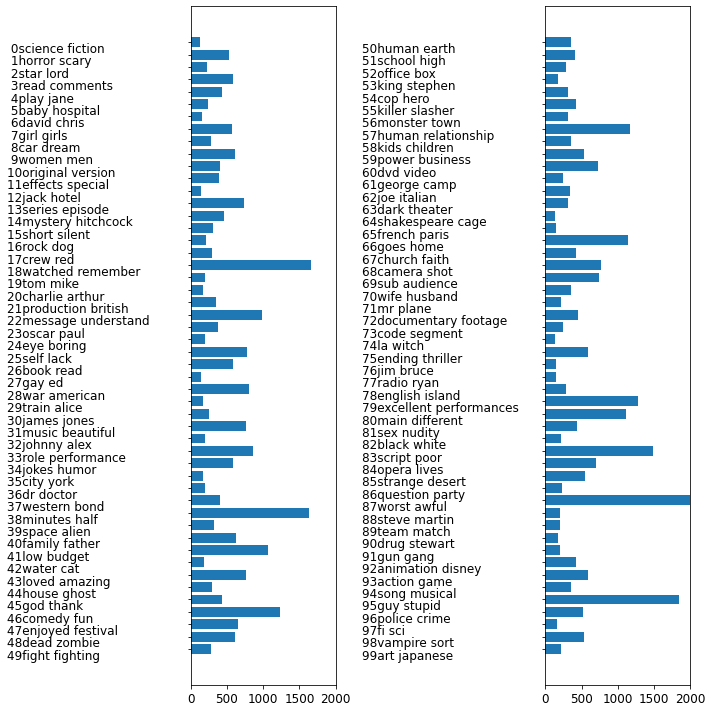

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
topic_names = ["{:>2}".format(i)  + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=180)
plt.tight_layout()

LDA가 장르와 점수라는 두 종류의 큰 토픽과 어디에도 속하지 않는 토픽 몇 개를 더 찾은 것 같다. 대부분의 리뷰가 특정 영화에 대한 의견이거나 평가 점수를 합리화하거나 강조하기 위한 댓글이라는 사실은 재미있는 발견이다.

LDA와 같은 토픽 모델링은 레이블이 없거나, 레이블이 있더라도 큰 규모의 텍스트 말뭉치를 해석하는 데 좋은 방법이다. LDA는 확률적 알고리즘이기 때문에 random_state 매개변수를 바꾸면 결과가 많이 달라진다. 토픽으로 구별하는 게 도움이 되더라도 비지도 학습에서 내린 결론은 보수적으로 평가해야 하므로 각 토픽에 해당하는 문서를 직접 보고 직관을 검증하는 게 좋다. <code>LDA.transform()</code> 메서드에서 만든 토픽이 지도 학습을 위한 압축된 표현으로 사용될 수도 있다. 특별히 훈련 샘플이 적을 때 유용하다.

# 문서 군집화 소개와 실습(

# 미주

<b id="p01">1</b> TfidfVectorizer는 CountVectorizer의 서브클래스로 CountVectorizer를 이용해 BOW를 만들고 TfidfTransformer를 사용해 TF-IDF 변환을 한다.

<b id="p02">2</b> 잠재 디리클레 할당에서 토픽은 우리가 일상적으로 이야기하는 주제가 아니다. 문서 샘플을 정해진 개수의 토픽으로 표현하기 때문에 어떤 성분에 가깝다. 실제 어떤 주제들이 나타나도록 토픽을 사전에 정의할 수 없다. 토픽 모델링의 결과를 보고 나서 각 토픽이 어떤 성향을 띠는지 알 수 있을 뿐이다.